In [1]:
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import warnings
warnings.filterwarnings('ignore')


from numpy.random import seed
seed(42)

import os
import tqdm
from os import walk

import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import BatchNormalization

In [3]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model, load_model, Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras.initializers import RandomNormal
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD
import pathlib
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling


In [4]:
import pathlib

train_ds = tf.keras.preprocessing.image_dataset_from_directory('Data/images/Images/', validation_split = .2, subset= 'training',
                                                      seed = 42, image_size = (256,256),
                                                      batch_size = 32)

Found 20580 files belonging to 120 classes.
Using 16464 files for training.


In [5]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory('Data/images/Images/', validation_split = .2, subset= 'validation',
                                                      seed = 42, image_size = (256,256),
                                                      batch_size = 32)

Found 20580 files belonging to 120 classes.
Using 4116 files for validation.


In [6]:
import re
class_names = train_ds.class_names
print(class_names)
dog_names = [word for line in class_names for word in re.split('0-|1-|2-|3-|4-|5-|6-|7-|8-|9-', line)]

['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094433-Yorkshire_t

In [7]:
[word for line in class_names for word in re.split('0-|1-|2-|3-|4-|5-|6-|7-|8-|9-', line)]

['n0208562',
 'Chihuahua',
 'n0208578',
 'Japanese_spaniel',
 'n0208593',
 'Maltese_dog',
 'n0208607',
 'Pekinese',
 'n0208624',
 'Shih-Tzu',
 'n0208664',
 'Blenheim_spaniel',
 'n0208691',
 'papillon',
 'n0208704',
 'toy_terrier',
 'n0208739',
 'Rhodesian_ridgeback',
 'n0208809',
 'Afghan_hound',
 'n0208823',
 'basset',
 'n0208836',
 'beagle',
 'n0208846',
 'bloodhound',
 'n0208863',
 'bluetick',
 'n0208907',
 'black-and-tan_coonhound',
 'n0208986',
 'Walker_hound',
 'n0208997',
 'English_foxhound',
 'n0209037',
 'redbone',
 'n0209062',
 'borzoi',
 'n0209072',
 'Irish_wolfhound',
 'n0209103',
 'Italian_greyhound',
 'n0209113',
 'whippet',
 'n0209124',
 'Ibizan_hound',
 'n0209146',
 'Norwegian_elkhound',
 'n0209163',
 'otterhound',
 'n0209183',
 'Saluki',
 'n0209200',
 'Scottish_deerhound',
 'n0209233',
 'Weimaraner',
 'n0209325',
 'Staffordshire_bullterrier',
 'n0209342',
 'American_Staffordshire_terrier',
 'n0209364',
 'Bedlington_terrier',
 'n0209375',
 'Border_terrier',
 'n0209385',

In [8]:
dog_names

['n0208562',
 'Chihuahua',
 'n0208578',
 'Japanese_spaniel',
 'n0208593',
 'Maltese_dog',
 'n0208607',
 'Pekinese',
 'n0208624',
 'Shih-Tzu',
 'n0208664',
 'Blenheim_spaniel',
 'n0208691',
 'papillon',
 'n0208704',
 'toy_terrier',
 'n0208739',
 'Rhodesian_ridgeback',
 'n0208809',
 'Afghan_hound',
 'n0208823',
 'basset',
 'n0208836',
 'beagle',
 'n0208846',
 'bloodhound',
 'n0208863',
 'bluetick',
 'n0208907',
 'black-and-tan_coonhound',
 'n0208986',
 'Walker_hound',
 'n0208997',
 'English_foxhound',
 'n0209037',
 'redbone',
 'n0209062',
 'borzoi',
 'n0209072',
 'Irish_wolfhound',
 'n0209103',
 'Italian_greyhound',
 'n0209113',
 'whippet',
 'n0209124',
 'Ibizan_hound',
 'n0209146',
 'Norwegian_elkhound',
 'n0209163',
 'otterhound',
 'n0209183',
 'Saluki',
 'n0209200',
 'Scottish_deerhound',
 'n0209233',
 'Weimaraner',
 'n0209325',
 'Staffordshire_bullterrier',
 'n0209342',
 'American_Staffordshire_terrier',
 'n0209364',
 'Bedlington_terrier',
 'n0209375',
 'Border_terrier',
 'n0209385',

In [9]:
len(class_names)

120

In [10]:
len(dog_names)

240

In [11]:
print([i for i in range(len(dog_names)) if i % 2 == 1])

dog_names2 =[]
for i in range(len(dog_names)):
        if i % 2 == 1:
            dog_names2.append(dog_names[i])

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207, 209, 211, 213, 215, 217, 219, 221, 223, 225, 227, 229, 231, 233, 235, 237, 239]


In [12]:
dog_names2

['Chihuahua',
 'Japanese_spaniel',
 'Maltese_dog',
 'Pekinese',
 'Shih-Tzu',
 'Blenheim_spaniel',
 'papillon',
 'toy_terrier',
 'Rhodesian_ridgeback',
 'Afghan_hound',
 'basset',
 'beagle',
 'bloodhound',
 'bluetick',
 'black-and-tan_coonhound',
 'Walker_hound',
 'English_foxhound',
 'redbone',
 'borzoi',
 'Irish_wolfhound',
 'Italian_greyhound',
 'whippet',
 'Ibizan_hound',
 'Norwegian_elkhound',
 'otterhound',
 'Saluki',
 'Scottish_deerhound',
 'Weimaraner',
 'Staffordshire_bullterrier',
 'American_Staffordshire_terrier',
 'Bedlington_terrier',
 'Border_terrier',
 'Kerry_blue_terrier',
 'Irish_terrier',
 'Norfolk_terrier',
 'Norwich_terrier',
 'Yorkshire_terrier',
 'wire-haired_fox_terrier',
 'Lakeland_terrier',
 'Sealyham_terrier',
 'Airedale',
 'cairn',
 'Australian_terrier',
 'Dandie_Dinmont',
 'Boston_bull',
 'miniature_schnauzer',
 'giant_schnauzer',
 'standard_schnauzer',
 'Scotch_terrier',
 'Tibetan_terrier',
 'silky_terrier',
 'soft-coated_wheaten_terrier',
 'West_Highland_wh

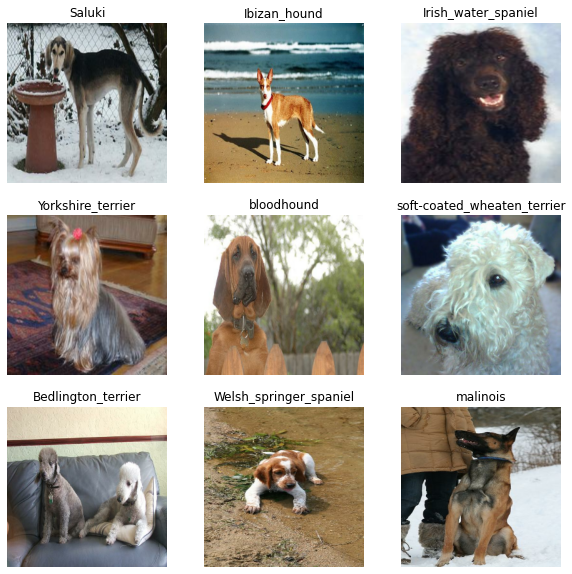

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(dog_names2[labels[i]])
    plt.axis("off")

In [14]:
# Configure for dataset performance
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [14]:
# Standardize the data

normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [15]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.012677242 1.0


In [16]:
normalized_test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_test_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [18]:
base_model = InceptionV3(weights='imagenet', 
                        include_top = False,
                        input_shape = (256,256,3),
                        classes = 120,
                        classifier_activation = "softmax")

In [19]:
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1, activation = 'softmax', kernel_initializer=RandomNormal())
])
base_model.summary()
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [20]:
train_ds

<PrefetchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [21]:
model.compile(optimizer = SGD(learning_rate=.0005, momentum = .9),
             loss = "categorical_crossentropy",
             metrics = ['accuracy'])
history = model.fit(train_ds, 
                   epochs = 15,
                   verbose = 1, 
                   validation_data= test_ds)

print(f"\nTraining Score: {model.evaluate(train_ds)}")
print(f"\nTest Score: {model.evaluate(test_ds)}")

Epoch 1/15
515/515 [==============================] - 515s 1s/step - loss: 0.0000e+00 - accuracy: 0.0086 - val_loss: 0.0000e+00 - val_accuracy: 0.0104
Epoch 2/15
515/515 [==============================] - 559s 1s/step - loss: 0.0000e+00 - accuracy: 0.0086 - val_loss: 0.0000e+00 - val_accuracy: 0.0104
Epoch 3/15
515/515 [==============================] - 566s 1s/step - loss: 0.0000e+00 - accuracy: 0.0086 - val_loss: 0.0000e+00 - val_accuracy: 0.0104
Epoch 4/15
515/515 [==============================] - 556s 1s/step - loss: 0.0000e+00 - accuracy: 0.0086 - val_loss: 0.0000e+00 - val_accuracy: 0.0104
Epoch 5/15
515/515 [==============================] - 554s 1s/step - loss: 0.0000e+00 - accuracy: 0.0086 - val_loss: 0.0000e+00 - val_accuracy: 0.0104
Epoch 6/15
515/515 [==============================] - 547s 1s/step - loss: 0.0000e+00 - accuracy: 0.0086 - val_loss: 0.0000e+00 - val_accuracy: 0.0104
Epoch 7/15
515/515 [==============================] - 539s 1s/step - loss: 0.0000e+00 - accura

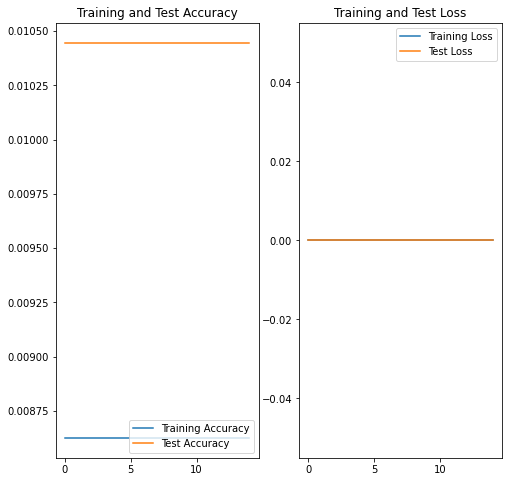

In [22]:
acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

loss = history.history['loss']
test_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, test_acc, label='Test Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Test Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, test_loss, label='Test Loss')
plt.legend(loc='upper right')
plt.title('Training and Test Loss')
plt.show()

In [23]:
num_classes = len(dog_names2)

model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)))
model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

history = model.fit(
    train_ds,
    epochs = 10, 
    validation_data = test_ds)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 64)       

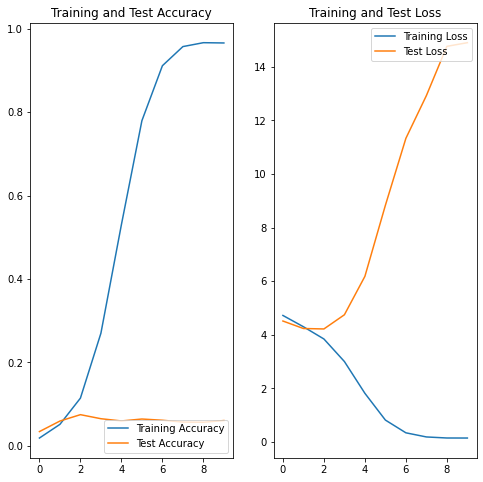

In [24]:
acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

loss = history.history['loss']
test_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, test_acc, label='Test Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Test Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, test_loss, label='Test Loss')
plt.legend(loc='upper right')
plt.title('Training and Test Loss')
plt.show()

In [25]:

print(f"\nTraining Score: {model.evaluate(train_ds)}")
print(f"\nTest Score: {model.evaluate(test_ds)}")

515/515 [==============================] - 86s 167ms/step - loss: 0.1223 - accuracy: 0.9709

Training Score: [0.12228894978761673, 0.9709061980247498]
129/129 [==============================] - 20s 158ms/step - loss: 14.9038 - accuracy: 0.0603

Test Score: [14.903775215148926, 0.06025267392396927]


In [17]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                      input_shape=(256,
                                  256,
                                  3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

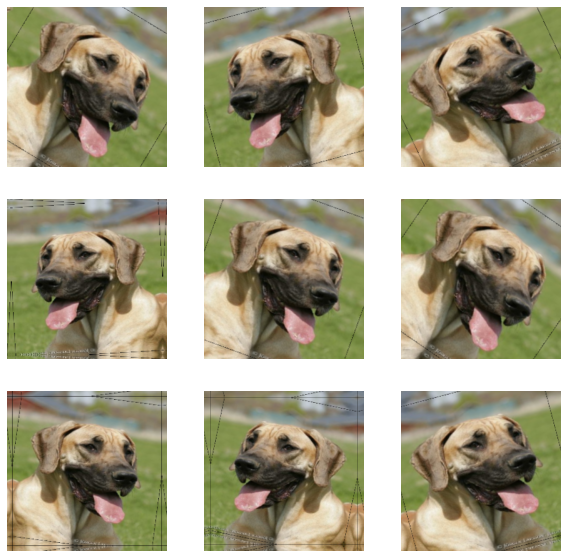

In [18]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential()
model.add(data_augmentation)
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)))
model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(dog_names2)))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

history = model.fit(
    train_ds,
    epochs = 15, 
    validation_data= test_ds)


print(f"\nTraining Score: {model.evaluate(train_ds)}")
print(f"\nTest Score: {model.evaluate(test_ds)}")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 256, 256, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 64)       

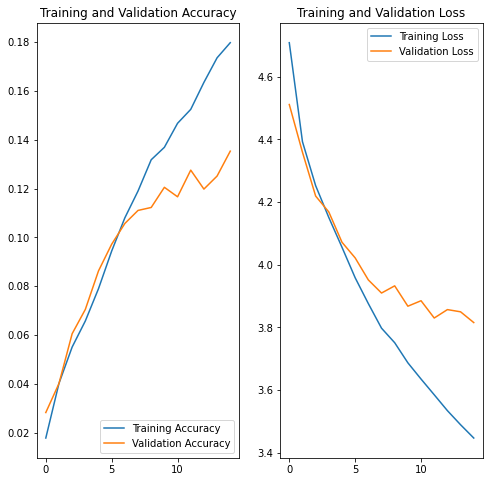

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [30]:
model = Sequential()
model.add(data_augmentation)
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)))
model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

history = model.fit(
    train_ds,
    epochs = 10, 
    validation_data= test_ds)


print(f"\nTraining Score: {model.evaluate(train_ds)}")
print(f"\nTest Score: {model.evaluate(test_ds)}")

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 256, 256, 3)       0         
_________________________________________________________________
rescaling_3 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 256, 256, 16)      448       
_________________________________________________________________
batch_normalization_94 (Batc (None, 256, 256, 16)      64        
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 128, 128, 32)      4640      
_________________________________________________________________
batch_normalization_95 (Batc (None, 128, 128, 32)     

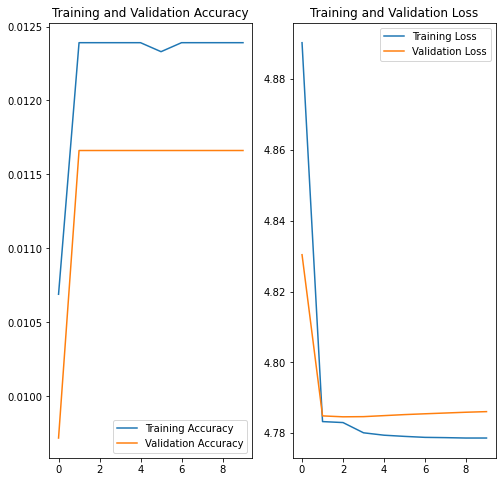

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()